
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>


# Análisis Estadístico de Datos


## Cuadrados mínimos lineal - modelo cuadrático

<ol>
<li>Modelo lineal</li>
<li>Modelo cuadrático</li>
<li>Reparametrización</li>
</ol>

In [34]:
import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import chi2

### Datos

In [35]:
# Para cargar archivos alojados en Colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [36]:
# bajar módulo sda.py e importar
dat_fil_Gid2 = '1Wm3uae2m7ZwXsn_02ZE1Qv7F_TM-KClm'
downloaded2 = drive.CreateFile({'id':dat_fil_Gid2})
downloaded2.GetContentFile('sda.py')
import sda

In [37]:
# load input file
dat_file_Gid = '1cA-KrM-s3Ag2Oa1EsQurPo7Nltw4Ys3j'
downloaded = drive.CreateFile({'id':dat_file_Gid})
downloaded.GetContentFile('beta.dat')
archivo_entrada = 'beta.dat'

In [38]:
datos = np.loadtxt(archivo_entrada)
datos

array([[1.02      , 2.24327   , 0.00831886],
       [1.06      , 2.21686   , 0.00797227],
       [1.1       , 2.20075   , 0.00998714],
       [1.14      , 2.17497   , 0.00938547],
       [1.18      , 2.13199   , 0.0105196 ],
       [1.22      , 2.11644   , 0.0158722 ],
       [1.26      , 2.08321   , 0.0185    ],
       [1.3       , 2.01585   , 0.0209518 ],
       [1.34      , 2.00369   , 0.0167014 ]])

In [39]:
xdata = datos.T[0]
ydata = datos.T[1]
ysigma = datos.T[2]

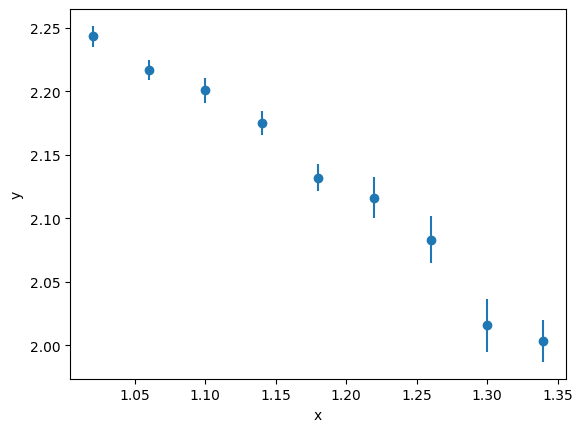

In [40]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(xdata, ydata, ysigma,ls='none', marker='o', label='datos')
plt.show()

### Matriz del modelo

In [41]:
def model_matrix(x):
    # return np.column_stack([x**0, x])  # modelo lineal
    # return np.column_stack([x**0, x**1, x**2])  # modelo cuadrático
     return np.column_stack([x**0, (x-1.2)**1, (x-1.2)**2]) # modelo cuadrático reparametrizado

In [42]:
A = model_matrix(xdata)
A

array([[ 1.00e+00, -1.80e-01,  3.24e-02],
       [ 1.00e+00, -1.40e-01,  1.96e-02],
       [ 1.00e+00, -1.00e-01,  1.00e-02],
       [ 1.00e+00, -6.00e-02,  3.60e-03],
       [ 1.00e+00, -2.00e-02,  4.00e-04],
       [ 1.00e+00,  2.00e-02,  4.00e-04],
       [ 1.00e+00,  6.00e-02,  3.60e-03],
       [ 1.00e+00,  1.00e-01,  1.00e-02],
       [ 1.00e+00,  1.40e-01,  1.96e-02]])

### Ajuste

In [43]:
res = sda.linear_least_squares(A, ydata, ysigma)
res

{'est': array([ 2.12527207, -0.79732439, -0.8253585 ]),
 'errors': array([0.00584235, 0.05342921, 0.41649271]),
 'cova': array([[ 3.41330708e-05,  2.36969323e-05, -1.33377946e-03],
        [ 2.36969323e-05,  2.85467996e-03,  1.41137377e-02],
        [-1.33377946e-03,  1.41137377e-02,  1.73466181e-01]]),
 'corr': array([[ 1.        ,  0.07591467, -0.54813677],
        [ 0.07591467,  1.        ,  0.63424334],
        [-0.54813677,  0.63424334,  1.        ]]),
 'chi2_min': 3.025813328271764,
 'ndof': 6,
 'pvalue': 0.805600081837231}

In [44]:
estimadores = res['est']
print(f'Estimadores: {estimadores}')

Estimadores: [ 2.12527207 -0.79732439 -0.8253585 ]


In [45]:
errores = res['errors']
print(f'Errores: {errores}')

Errores: [0.00584235 0.05342921 0.41649271]


In [46]:
cova = res['cova']
print(f'Covarianza parámetros: {cova}')

Covarianza parámetros: [[ 3.41330708e-05  2.36969323e-05 -1.33377946e-03]
 [ 2.36969323e-05  2.85467996e-03  1.41137377e-02]
 [-1.33377946e-03  1.41137377e-02  1.73466181e-01]]


In [47]:
corr = res['corr']
print(f'Correlación parámetros: {corr}')

Correlación parámetros: [[ 1.          0.07591467 -0.54813677]
 [ 0.07591467  1.          0.63424334]
 [-0.54813677  0.63424334  1.        ]]


### Graficar

In [48]:
x = np.linspace( xdata.min(), xdata.max(), 100)
A1 = model_matrix(x)
mu_est = A1 @ estimadores
sigma_mu_est = sda.fit_errors(A1, cova)

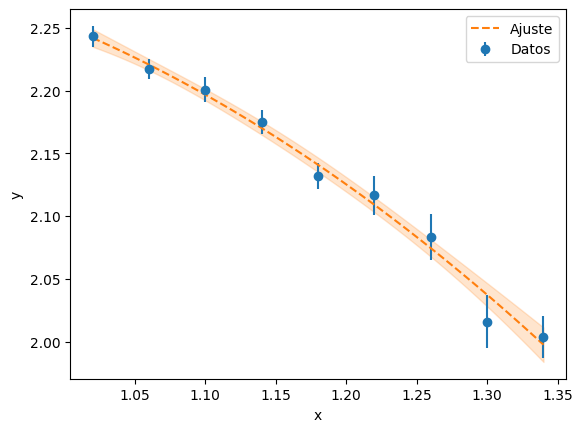

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.errorbar(xdata, ydata, ysigma, ls='none', marker='o', label='Datos')
ax.plot(x, mu_est, ls='--', label='Ajuste')
ax.fill_between(x, mu_est-sigma_mu_est, mu_est+sigma_mu_est, color='tab:orange', alpha=0.2)
ax.legend()
plt.show()